## 01 Julia Introduction for EECS 551

2018-08-11 Jeff Fessler (based on 2017 version by David Hong)  
Julia 0.7.0  
2019-01-20 Julia 1.0.3 and add note about line breaks  
2020-08-05 Julia 1.5.0
2021-08-23 Julia 1.6.2

## Numbers and arithmetic (and thinking about types!)

Make a real number!

In [1]:
r = 3.0

3.0

Variables in Julia have a type.

In [2]:
typeof(r)

Float64

In [3]:
i = 3

3

In [4]:
typeof(i)

Int64

In [5]:
c = 3. + 2im

3.0 + 2.0im

In [6]:
typeof(c)

ComplexF64 (alias for Complex{Float64})

We can add, subtract, multiply and divide like usual.

In [7]:
4. + 5

9.0

In [8]:
4. - 5

-1.0

In [9]:
4. * 3

12.0

In [10]:
2. / 3

0.6666666666666666

Dividing `Int` values with `\` produces a `Float`:

In [11]:
2/3

0.6666666666666666

In [12]:
4/2

2.0

This is different from Python 2, but similar to Python 3.

To divide integers with rounding, use `÷` instead.  Type `\div` then hit tab.

In [13]:
5 ÷ 2

2

More info about numbers here:
+ https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers
+ https://docs.julialang.org/en/v1/manual/mathematical-operations
+ https://docs.julialang.org/en/v1/manual/complex-and-rational-numbers

## Vector and matrices (i.e., arrays)

Make a vector of real numbers:

$x = \begin{bmatrix} 1.0 \\ 3.5 \\ 2 \end{bmatrix}$

In [14]:
x = [1, 3.5, 2]

3-element Vector{Float64}:
 1.0
 3.5
 2.0

Note the type: `Array{Float64,1}`.  
Having just one real number in the array sufficed
for the array have all `Float64` elements.

This is a true **one**-dimensional array of **`Float64`**'s.  
(Matlab does not have 1D arrays; it fakes it using 2D arrays of size N × 1.)

In [15]:
size(x) # returns a tuple

(3,)

In [16]:
length(x)

3

In [17]:
x_ints = [1,3,2]

3-element Vector{Int64}:
 1
 3
 2

This is a **one**-dimensional array of **`Int64`**'s.
We'll use these less often in 551.

In [18]:
size(x_ints)

(3,)

In [19]:
length(x_ints)

3

Make a matrix using a semicolon to separate rows:

$ A = \begin{bmatrix}
1.1 & 1.2 & 1.3 \\
2.1 & 2.2 & 2.3
\end{bmatrix}$

In [20]:
A = [1.1 1.2 1.3; 2.1 2.2 2.3]

2×3 Matrix{Float64}:
 1.1  1.2  1.3
 2.1  2.2  2.3

This is a **two**-dimensional array (aka a matrix) of **`Float64`** values.

In [21]:
size(A)

(2, 3)

In [22]:
length(A)

6

Different from Matlab! `length` always returns the total number of elements.

Make vectors and matrices of all zeros.

In [23]:
zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

Different from Matlab!
Do not write `zeros(3,1)` because Julia has proper 1D arrays.  
`zeros(3,1)` and `zeros(3)` are different!

In [24]:
zeros(2,3)

2×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0

And ones:

In [25]:
ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [26]:
ones(2,3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

The "identity matrix" ``I`` in Julia's `LinearAlgebra` package is sophisticated.  
Look at the following examples:

In [27]:
using LinearAlgebra
ones(3,3) - I

3×3 Matrix{Float64}:
 0.0  1.0  1.0
 1.0  0.0  1.0
 1.0  1.0  0.0

In [28]:
ones(2,2) * I

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

In [29]:
I(3)

3×3 Diagonal{Bool, Vector{Bool}}:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

If that ``I`` seems too fancy, then you could make your own "eye" command
akin to Matlab as follows
(but it should not be needed and it uses unnecessary memory):

In [79]:
eye = m -> Matrix(1.0*I(m))
eye(10)

10×10 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

Make diagonal matrices using the `Diagonal` function in `LinearAlgebra`

In [31]:
Diagonal(3:6)

4×4 Diagonal{Int64, UnitRange{Int64}}:
 3  ⋅  ⋅  ⋅
 ⋅  4  ⋅  ⋅
 ⋅  ⋅  5  ⋅
 ⋅  ⋅  ⋅  6

This is far more memory efficient than Matlab's `diag` command
or Julia's `LinearAlgebra.diagm` method.  Avoid using those!

Make random vectors and matrices.

$ x = \begin{bmatrix} \mathcal{N}(0,1) \\ \mathcal{N}(0,1) \\ \mathcal{N}(0,1) \end{bmatrix}
\qquad \text{i.e.,} \quad x_i \overset{\text{iid}}{\sim} \mathcal{N}(0,1)$

$ A = \begin{bmatrix}
\mathcal{N}(0,1) & \mathcal{N}(0,1) & \mathcal{N}(0,1) \\
\mathcal{N}(0,1) & \mathcal{N}(0,1) & \mathcal{N}(0,1)
\end{bmatrix}
\qquad \text{i.e., } \quad A_{ij} \overset{\text{iid}}{\sim} \mathcal{N}(0,1)$

In [32]:
x = randn(3)

3-element Vector{Float64}:
 -0.5471883735928278
 -0.7358306180839901
  0.6749416936737584

In [33]:
A = randn(2,3)

2×3 Matrix{Float64}:
 -0.148356  0.671628  0.436795
  1.17156   0.590388  0.18384

### Matrix operations

Indexing is done with **square** brackets and begins at **1**
(like in Matlab and counting) not **0** (like in C or Python).

In [34]:
A = [1.1 1.2 1.3; 2.1 2.2 2.3]

2×3 Matrix{Float64}:
 1.1  1.2  1.3
 2.1  2.2  2.3

In [35]:
A[1,1]

1.1

In [36]:
A[1,2:3]

2-element Vector{Float64}:
 1.2
 1.3

This row-slice is a one-dimensional slice! Not a `1×2` matrix.

In [37]:
A[1:2,1]

2-element Vector{Float64}:
 1.1
 2.1

In [38]:
A[2,:]

3-element Vector{Float64}:
 2.1
 2.2
 2.3

Vector dot product

In [39]:
x = randn(3)
xdx = x'x

3.330937690562305

In [40]:
xdx = dot(x,x)

3.330937690562305

In [41]:
xdx = x'*x

3.330937690562305

Different from Matlab! The output is a scalar, **not** a `1×1` "matrix."

In [42]:
typeof(xdx)

Float64

Matrix times vector

In [43]:
A = randn(2,3)
x = randn(3)
A*x

2-element Vector{Float64}:
 0.4852159451090972
 0.545979748823164

Matrix times matrix

In [44]:
A = randn(2,3)
B = randn(3,4)
A*B

2×4 Matrix{Float64}:
  7.70531  0.285582  3.1724     2.76604
 -3.61854  0.88501   0.087116  -2.41399

Matrix transpose (conjugate and non-conjugate)

In [45]:
A = 10*reshape(1:6, 2, 3) + im * reshape(1:6, 2, 3)

2×3 Matrix{Complex{Int64}}:
 10+1im  30+3im  50+5im
 20+2im  40+4im  60+6im

In [46]:
A' # conjugate transpose, could also use adjoint(A)

3×2 adjoint(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 10-1im  20-2im
 30-3im  40-4im
 50-5im  60-6im

In [47]:
# For complex arrays, rarely do we need a non-conjugate transpose.
# Usually we need A' instead.  But if we do:

In [48]:
transpose(A) # essentially sets a flag about transpose without reordering data

3×2 transpose(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 10+1im  20+2im
 30+3im  40+4im
 50+5im  60+6im

Matrix determinant

In [49]:
A = Diagonal(2:4)
det(A)

24

In [50]:
B = randn(3,3)
[det(A*B) det(A)*det(B)]

1×2 Matrix{Float64}:
 -10.4052  -10.4052

Matrix trace

In [51]:
A = ones(3,3)
tr(A) # in Matlab would be "trace(A)"

3.0

More info here: https://docs.julialang.org/en/v1/manual/arrays

### Important Aside: Getting help!

Julia analogue of Matlab's `help` is `?`

In [52]:
?pwd

search: pwd powermod



```
pwd() -> AbstractString
```

Get the current working directory.

See also: [`cd`](@ref), [`tempdir`](@ref).

# Examples

```julia-repl
julia> pwd()
"/home/JuliaUser"

julia> cd("/home/JuliaUser/Projects/julia")

julia> pwd()
"/home/JuliaUser/Projects/julia"
```


Full documentation online: https://docs.julialang.org/en/stable/  
Searching their Github repo can sometimes also uncover folks with similar issues: https://github.com/JuliaLang/julia

Also lots of neat talks on their Youtube Channel: https://www.youtube.com/user/JuliaLanguage  
Especially encourage this very interesting one about vector transposes! https://www.youtube.com/watch?v=C2RO34b_oPM

### Aside: Creating ranges
It's different from (and much more efficient than) Matlab!

In [53]:
myrange = -2:3

-2:3

In [54]:
typeof(myrange)

UnitRange{Int64}

Not an Array! But can be indexed.

In [55]:
myrange[1]

-2

Used often in `for` loops.

In [56]:
for a in myrange
    println(a)
end

-2
-1
0
1
2
3


Form an array by using `collect` if needed (use rarely):

In [57]:
collect(myrange)

6-element Vector{Int64}:
 -2
 -1
  0
  1
  2
  3

Other ways to make ranges.

In [58]:
srange =1:-1:-5

1:-1:-5

In [59]:
typeof(srange)

StepRange{Int64, Int64}

In [60]:
#lrange = linspace(0,10,6) # deprecated in 0.7
lrange = range(0, step=2, stop=10)

0:2:10

In [61]:
typeof(lrange)

StepRange{Int64, Int64}

In [62]:
LinRange(0,10,6) # yet another option that looks the most like linspace !

6-element LinRange{Float64, Int64}:
 0.0,2.0,4.0,6.0,8.0,10.0

### Aside: Comprehensions

A convenient way to create arrays!

In [63]:
comp = [i+0.1 for i in 1:5]

5-element Vector{Float64}:
 1.1
 2.1
 3.1
 4.1
 5.1

In [64]:
comp = [i+0.1*j for i in 1:5, j in 1:4]

5×4 Matrix{Float64}:
 1.1  1.2  1.3  1.4
 2.1  2.2  2.3  2.4
 3.1  3.2  3.3  3.4
 4.1  4.2  4.3  4.4
 5.1  5.2  5.3  5.4

## Defining functions

Way 1

In [65]:
function f1(x,y)
    z = x+y
    return z
end

f1 (generic function with 1 method)

Way 2

In [66]:
f2(x,y) = x+y

f2 (generic function with 1 method)

Way 3: Anonymous function

In [67]:
f3 = (x,y) -> x+y

#7 (generic function with 1 method)

Can return multiple outputs

In [68]:
function f_mult(x,y)
    add = x+y
    sub = x-y
    return add,sub
end

f_mult (generic function with 1 method)

In [69]:
f_mult(2,3)

(5, -1)

In [70]:
out_tuple = f_mult(2,3)

(5, -1)

In [71]:
typeof(out_tuple)

Tuple{Int64, Int64}

Output is a `Tuple` of the outputs.

Convenient way to split out the outputs.

In [72]:
out1,out2 = f_mult(2,3)

(5, -1)

In [73]:
out1

5

In [74]:
out2

-1

Any function can be "vectorized" using "broadcast" capability.

In [75]:
myquad = x -> (x+1)^2

#9 (generic function with 1 method)

In [76]:
myquad(1)

4

In [77]:
myquad([1,2,3]) # this does not work!  but see next cell!

LoadError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/int.jl:87
[0m  +([91m::Rational[39m, ::Integer) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/rational.jl:311
[0m  ...

This particular function was not designed to be applied to vector input arguments!  
But it can be used with vectors by adding a "." to tell Julia to apply it element-wise.
This is called a "broadcast"

In [ ]:
myquad.([1,2,3])

More info here: https://docs.julialang.org/en/v1/manual/functions

### Conditionals: If, Else, End, For

Generally similar to Matlab. Optional use of `in` instead of `=` in the for loop.

In [ ]:
for j in 1:3
    if j == 2
        println("This is a two! ^^")
    else
        println("This is not a two. :(")
    end
end

Julia has the convenient ternary operator.

In [ ]:
mystring = 2 > 3 ? "2 is greater than 3" : "2 is not greater than 3"

## Plotting
Suggested package: `Plots.jl` with its default `gr` backend.

**Note:** Usually slower the first time you plot due to precompiling.  
You must `add` the "Plots" package first.
In a regular Julia REPL you do this by using the `]` key to enter the package manager REPL, and then type `add Plots` then wait.  
In a Jupyter notebook, type `using Pkg` then `add Plots` and wait.

In [80]:
using Plots
backend()

Plots.GRBackend()

Plot values from a vector.  (The labels are optional arguments.)

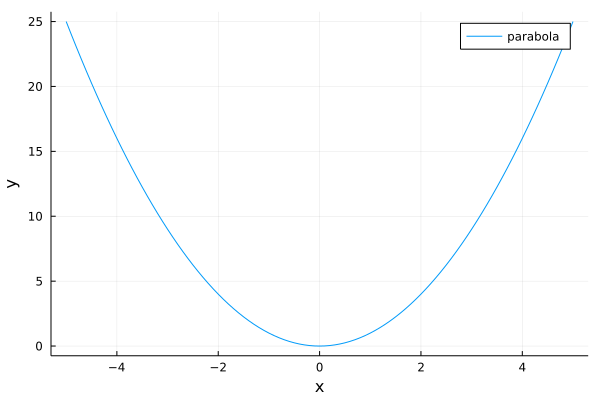

In [81]:
x = LinRange(-5,5,101)
y = x.^2
plot(x, y, xlabel="x", ylabel="y", label="parabola")

### Revisiting the heatmap
cf example in `n-01-matrix` notes

In [ ]:
x = LinRange(-2, 2, 101)
y = LinRange(-1.1, 1.1, 103)
A = x.^2 .+ 30 * (y.^2)'
F = exp.(-A)
heatmap(x, y, F, transpose=true, # for F(x,y)
    color=:grays, aspect_ratio=:equal, xlabel="x", ylabel="y", title="bump")

Using the `jim` function the `MIRTjim.jl` package simplifies
the display of 2D images, among other features. See:
https://jefffessler.github.io/MIRTjim.jl/stable/examples/1-examples/

### A convenient way to plot functions

`Plots.jl` allows you to pass in the domain and a function. It does the rest. :)  
This is one many examples of how Julia exploits "multiple dispatch."

In [ ]:
plot(LinRange(0,1,100), x -> x^2, label="x^2")

In [ ]:
heatmap(LinRange(-2,2,102), LinRange(-1.1,1.1,100),
    (x,y) -> exp(-x^2-30*y^2), aspect_ratio=1)

More info about plotting here: https://juliaplots.github.io

### Caution about line breaks (newlines)  
If you want an expression to span multiple lines,
then be sure to enclose it in parentheses.

In [ ]:
# Compare the following 3 (actually 4) expressions before `@show`
x = 9
    - 7

y = 9 -
    7

z = (9
    - 7)

@show (x,y,z);

## Submitting homework

A quick example to try submitting problems.

**Task:** Implement a function that takes two inputs and outputs them in reverse order.

In [ ]:
function template1(x,y)
    return (y,x)
end

In [ ]:
template1(2,3)

Copy the above function code into a file named `template1.jl`
and email to `eecs551@autograder.eecs.umich.edu`.

Make sure that:
+ All reasonable input types can be handled. Internally trying to convert a `Float64` to an `Int64` can produce `InexactError`
+ File extension is ".jl". Watch out for hidden extensions!
+ File has just the Julia function.
(Your HW solutions can also contain `using` statements.)

An undocumented function is bad programming practice.  
Julia supports `docstrings` for comments like this:

In [ ]:
"""
    template2(x,y)
This function reverses the order of the two input arguments.
"""
function template2(x,y)
    return (y,x)
end

You can see the docstring by using the `?` key:

In [ ]:
?template2